> 芝加哥着火和失窃的数据对

http://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/slr05.html

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import xlrd

DATA_FILE = 'data/fire_theft.xls'

book = xlrd.open_workbook(DATA_FILE, encoding_override="utf-8")
sheet = book.sheet_by_index(0)
print(sheet.nrows)
print(sheet.ncols)

43
2


In [10]:
data = np.asarray([sheet.row_values(i) for i in range(1, sheet.nrows)])
n_samples = sheet.nrows - 1

print(n_samples)
print(data)

42
[[  6.2  29. ]
 [  9.5  44. ]
 [ 10.5  36. ]
 [  7.7  37. ]
 [  8.6  53. ]
 [ 34.1  68. ]
 [ 11.   75. ]
 [  6.9  18. ]
 [  7.3  31. ]
 [ 15.1  25. ]
 [ 29.1  34. ]
 [  2.2  14. ]
 [  5.7  11. ]
 [  2.   11. ]
 [  2.5  22. ]
 [  4.   16. ]
 [  5.4  27. ]
 [  2.2   9. ]
 [  7.2  29. ]
 [ 15.1  30. ]
 [ 16.5  40. ]
 [ 18.4  32. ]
 [ 36.2  41. ]
 [ 39.7 147. ]
 [ 18.5  22. ]
 [ 23.3  29. ]
 [ 12.2  46. ]
 [  5.6  23. ]
 [ 21.8   4. ]
 [ 21.6  31. ]
 [  9.   39. ]
 [  3.6  15. ]
 [  5.   32. ]
 [ 28.6  27. ]
 [ 17.4  32. ]
 [ 11.3  34. ]
 [  3.4  17. ]
 [ 11.9  46. ]
 [ 10.5  42. ]
 [ 10.7  43. ]
 [ 10.8  34. ]
 [  4.8  19. ]]


In [11]:
# 创建模型
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

W = tf.Variable(0.0, name='weights')
b = tf.Variable(0.0, name='bias')

Y_predict = X * W + b

loss = tf.square(Y - Y_predict, name='loss')

opt = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(100):
        for x, y in data:
            sess.run(opt, feed_dict = {X: x, Y: y})
    
    w_value, b_value = sess.run([W, b])
    print(w_value)
    print(b_value)

1.7183813
15.789157


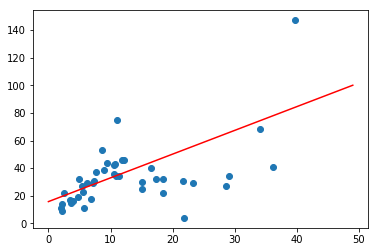

In [17]:
plt_x = data[:, 0]
plt_y = data[:, 1]

plt.scatter(plt_x, plt_y)

px = np.arange(0, 50)
py = px*1.7183813 + 15.789157
plt.plot(px, py, c='r')

plt.show()

In [35]:
# 创建模型
X = tf.placeholder(tf.float64, name='X')
Y = tf.placeholder(tf.float64, name='Y')

w = tf.Variable(0.0, dtype=tf.float64, name='weights_1')
u = tf.Variable(0.0, dtype=tf.float64, name='weights_2')
b = tf.Variable(0.0, dtype=tf.float64, name='bias')

Y_predict = X * X * w + X * u + b

loss = tf.square(Y - Y_predict, name='loss')

opt2 = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(5):
        for x, y in data:
            sess.run(opt2, feed_dict = {X: x, Y: y})
    
    w_value, u_value, b_value = sess.run([w, u, b])
    print(w_value)
    print(u_value)
    print(b_value)

1.2622225594355019e+269
2.033103150807566e+269
5.874135787267425e+268
